In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("emotional_monitoring_dataset_with_target.csv")
df1.head()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3


In [4]:
df1.columns

Index(['HeartRate', 'SkinConductance', 'EEG', 'Temperature', 'PupilDiameter',
       'SmileIntensity', 'FrownIntensity', 'CortisolLevel', 'ActivityLevel',
       'AmbientNoiseLevel', 'LightingLevel', 'EmotionalState',
       'CognitiveState', 'EngagementLevel'],
      dtype='object')

In [5]:
df1.shape

(1000, 14)

In [6]:
df1.describe()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EngagementLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,89.428000,4.886971,8.493616,36.745107,2.833396,0.422318,0.348089,1.242361,83.349000,44.585000,655.651000,2.482000
std,17.339651,4.187668,5.616052,0.435840,0.535909,0.282820,0.236208,0.430722,54.734642,8.672369,197.732236,0.666423
min,60.000000,0.008741,0.019809,36.000958,2.000573,0.000875,0.000050,0.500255,0.000000,30.000000,302.000000,1.000000
25%,75.000000,1.602463,3.993575,36.370811,2.398951,0.155963,0.155691,0.860270,39.000000,37.000000,487.750000,2.000000
50%,89.000000,3.413038,7.400188,36.743273,2.747615,0.397790,0.290736,1.252747,76.000000,44.000000,654.500000,3.000000
75%,105.000000,7.719411,13.004892,37.115120,3.228348,0.650723,0.573842,1.612069,124.000000,52.000000,822.250000,3.000000
max,119.000000,14.998714,19.987929,37.498955,3.996728,0.998751,0.799369,1.999461,199.000000,59.000000,999.000000,3.000000


In [7]:
df1.isna().sum()

HeartRate            0
SkinConductance      0
EEG                  0
Temperature          0
PupilDiameter        0
SmileIntensity       0
FrownIntensity       0
CortisolLevel        0
ActivityLevel        0
AmbientNoiseLevel    0
LightingLevel        0
EmotionalState       0
CognitiveState       0
EngagementLevel      0
dtype: int64

Text(0.5, 1.0, 'Heart Rate Distribution')

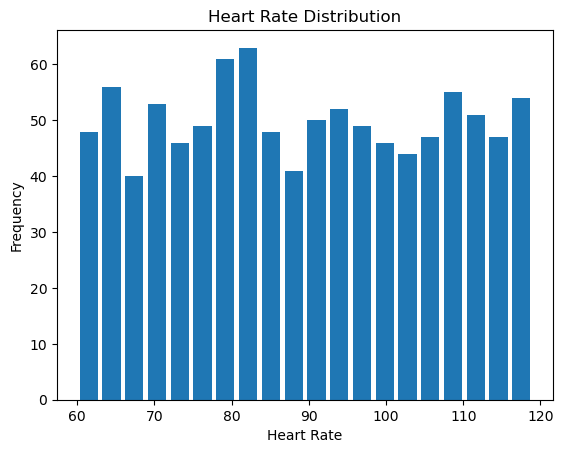

In [19]:
plt.hist(df1.HeartRate, bins=20, rwidth=0.8)
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.title("Heart Rate Distribution")

Text(0.5, 1.0, 'Heart Rate by Emotional State')

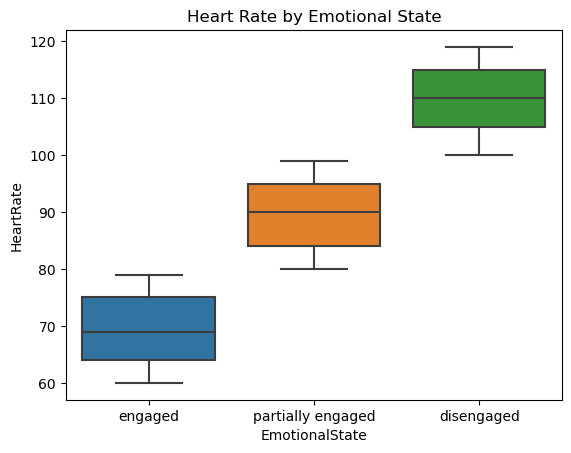

In [28]:
sns.boxplot(x=df1.EmotionalState, y=df1.HeartRate, data=df1)
plt.title("Heart Rate by Emotional State")

Text(0.5, 1.0, 'Pupil Diameter by Emotional State')

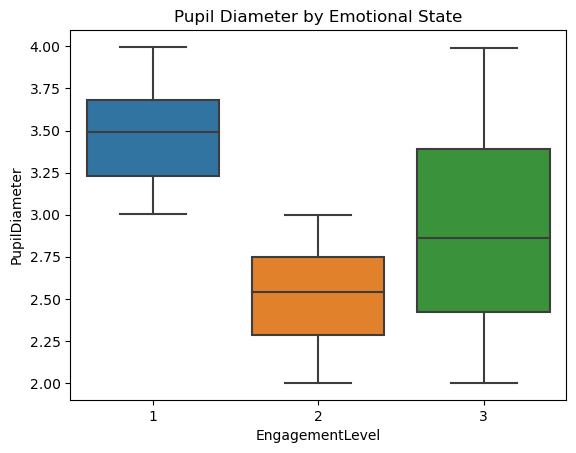

In [36]:
sns.boxplot(x=df1.EngagementLevel, y=df1.PupilDiameter, data=df1)
plt.title("Pupil Diameter by Engagement Level")

In [55]:
import matplotlib
def scatter_plot(df):
    activity_level = df.ActivityLevel
    heart_rate = df.SmileIntensity
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(activity_level, heart_rate, color="red", s=50)
#     plt.legend()
    plt.xlabel("ActivityLevel")
    plt.ylabel("SmileIntensity")
    plt.title("Activity Level against Smile Intensity")

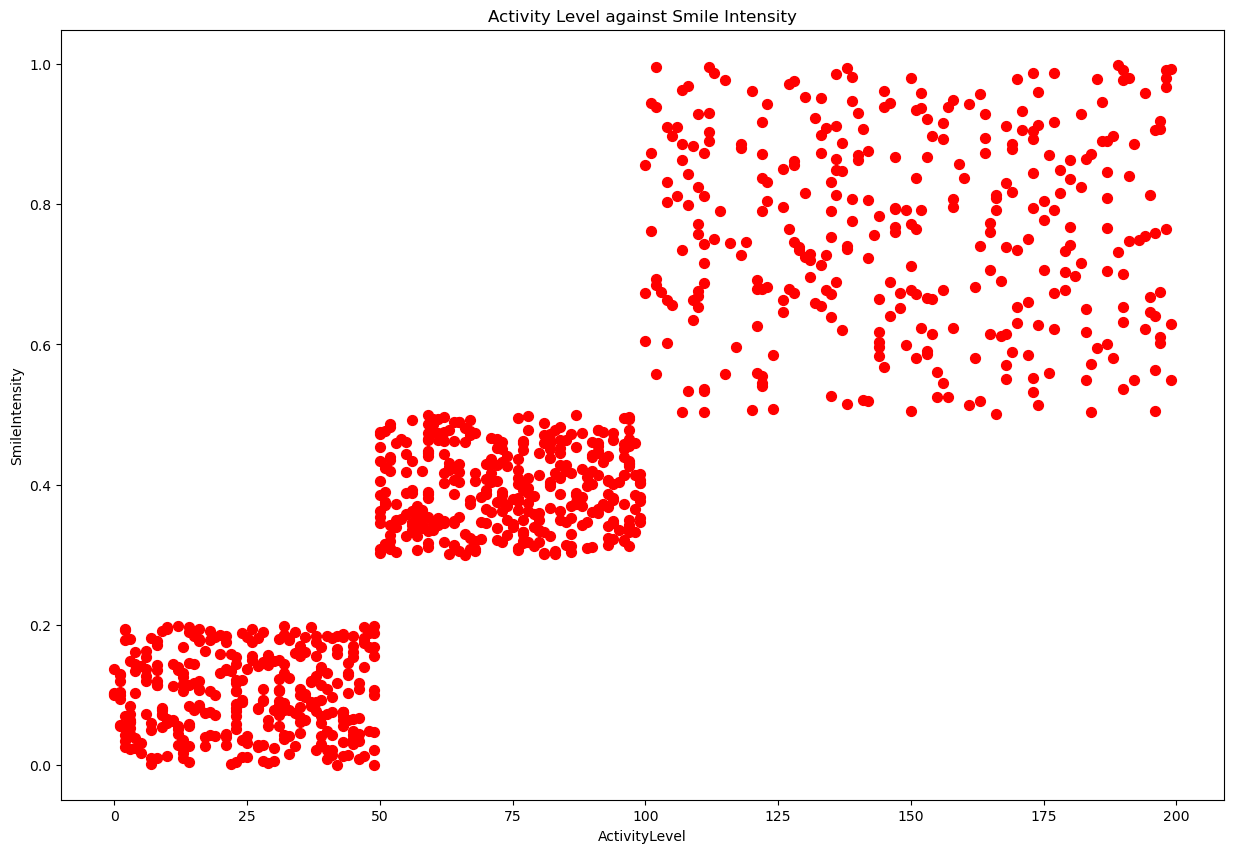

In [56]:
scatter_plot(df1)

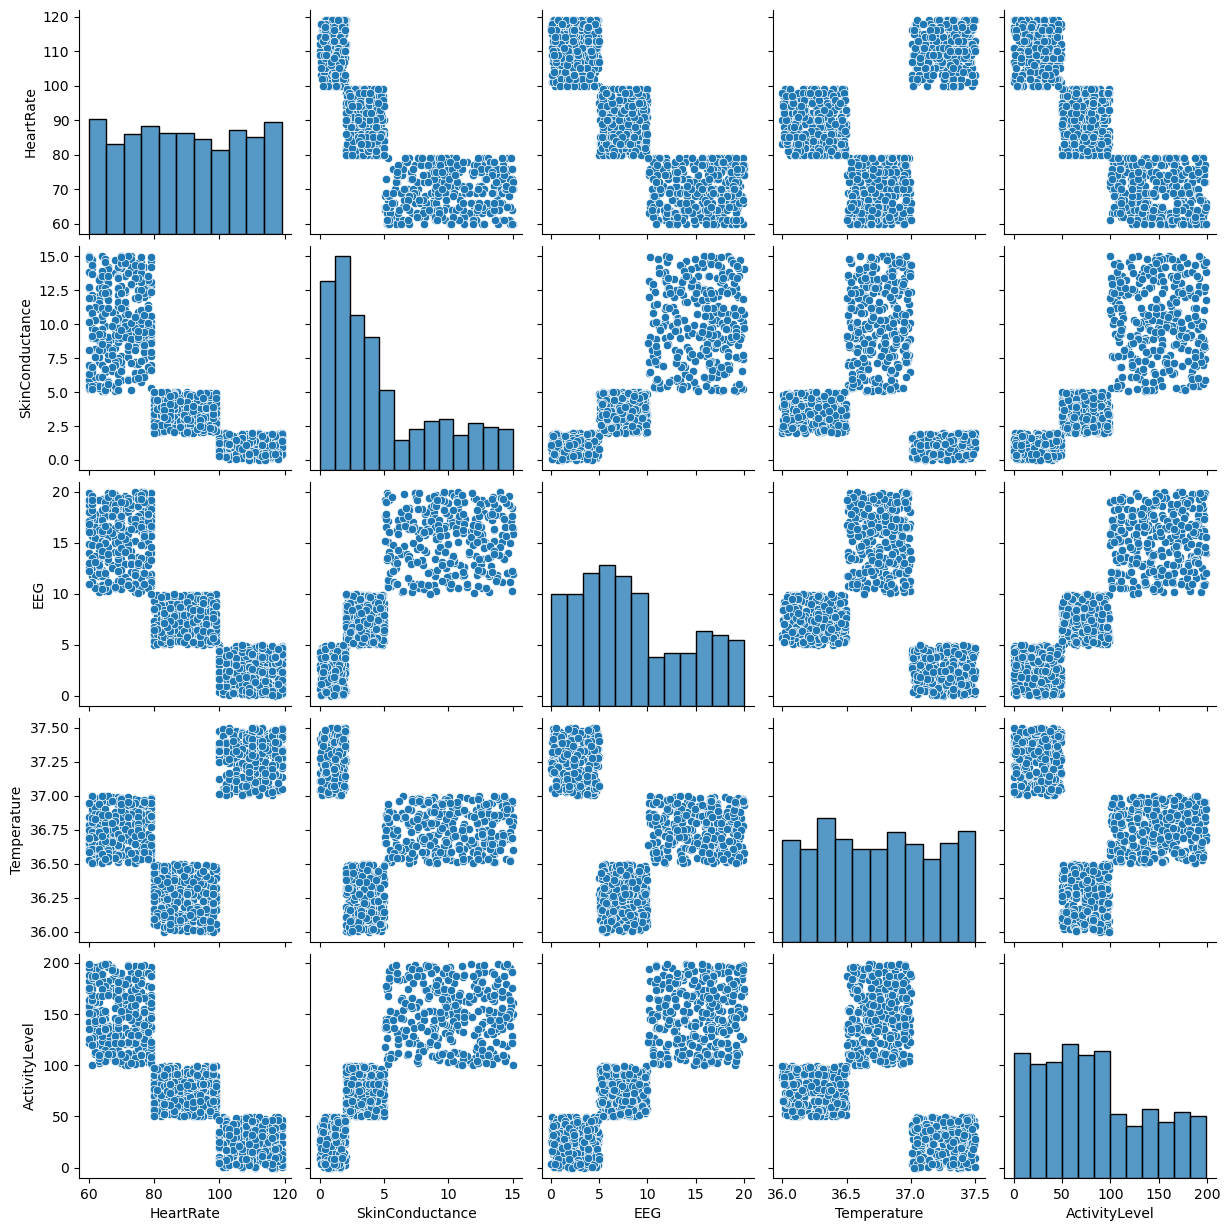

In [57]:
sns.pairplot(df1[['HeartRate', 'SkinConductance', 'EEG', 'Temperature', 'ActivityLevel']])

Text(0.5, 1.0, 'Cortisol Level by Activity Level')

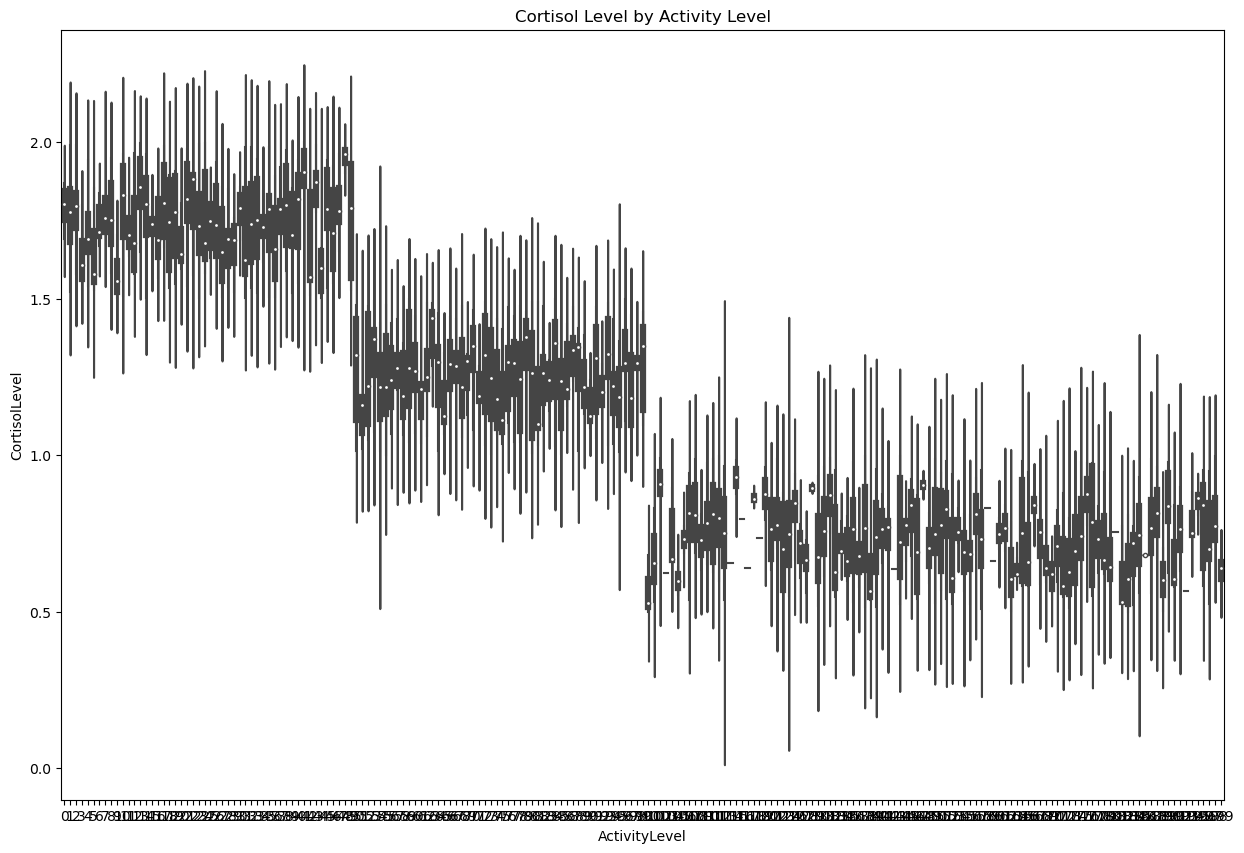

In [59]:
sns.violinplot(x='ActivityLevel', y='CortisolLevel', data=df1)
plt.title('Cortisol Level by Activity Level')

In [62]:
df2 = pd.get_dummies(df1, columns=["EmotionalState", 'CognitiveState'])
df2

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EngagementLevel,EmotionalState_disengaged,EmotionalState_engaged,EmotionalState_partially engaged,CognitiveState_distracted,CognitiveState_focused
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,3,0,1,0,1,0
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,1,0,1,0,1,0
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,3,0,0,1,0,1
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,3,1,0,0,0,1
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,98,3.897648,7.681519,36.274526,2.624275,0.404309,0.204719,1.215872,65,50,913,2,0,0,1,1,0
996,109,0.439062,0.352790,37.173929,2.489483,0.070776,0.638161,1.826544,23,43,642,2,1,0,0,1,0
997,108,1.077287,1.836462,37.073454,2.370298,0.011001,0.595518,1.781096,8,43,620,2,1,0,0,1,0
998,76,14.260010,19.309704,36.708047,3.393744,0.653693,0.171151,0.783958,110,38,779,1,0,1,0,1,0


In [64]:
X = df2.drop(["EngagementLevel"],axis=1)
X

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState_disengaged,EmotionalState_engaged,EmotionalState_partially engaged,CognitiveState_distracted,CognitiveState_focused
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,0,1,0,1,0
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,0,1,0,1,0
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,0,0,1,0,1
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,1,0,0,0,1
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,98,3.897648,7.681519,36.274526,2.624275,0.404309,0.204719,1.215872,65,50,913,0,0,1,1,0
996,109,0.439062,0.352790,37.173929,2.489483,0.070776,0.638161,1.826544,23,43,642,1,0,0,1,0
997,108,1.077287,1.836462,37.073454,2.370298,0.011001,0.595518,1.781096,8,43,620,1,0,0,1,0
998,76,14.260010,19.309704,36.708047,3.393744,0.653693,0.171151,0.783958,110,38,779,0,1,0,1,0


In [65]:
y = df2.EngagementLevel
y

0      3
1      1
2      3
3      3
4      3
      ..
995    2
996    2
997    2
998    1
999    3
Name: EngagementLevel, Length: 1000, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    print(f"{model_name}:")
    print(f"  MSE: {mse}")
    print(f"  R-squared: {r2}")
    print("-" * 50)

Linear Regression:
  MSE: 0.36280996083524614
  R-squared: 0.16972375802907214
--------------------------------------------------
Decision Tree Regressor:
  MSE: 0.0
  R-squared: 1.0
--------------------------------------------------
Random Forest Regressor:
  MSE: 0.0029100000000000016
  R-squared: 0.993340580124721
--------------------------------------------------
Support Vector Regressor:
  MSE: 0.642029881658217
  R-squared: -0.46925998434285043
--------------------------------------------------
K-Nearest Neighbors:
  MSE: 0.5112000000000001
  R-squared: -0.16986097602837735
--------------------------------------------------


In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([1., 1., 1., 1., 1.])